In [1]:
!pip install xgboost

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,r2_score

import joblib

In [6]:
df = pd.read_csv('EPL Standings 2000-2022.csv')

In [7]:
df

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]
...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship


In [8]:
df.shape

(440, 12)

In [9]:
df['Qualification or relegation'].unique()

array(['Qualification for the Champions League first group stage',
       'Qualification for the Champions League third qualifying round[a]',
       'Qualification for the UEFA Cup first round[a]', 'Not Applicable',
       'Qualification for the Intertoto Cup third round',
       'Relegation to the Football League First Division',
       'Qualification for the Champions League third qualifying round',
       'Qualification for the UEFA Cup first round[b]',
       'Qualification for the UEFA Cup first round[c]',
       'Qualification for the Intertoto Cup second round',
       'Qualification for the UEFA Cup qualifying round[a]Relegation to the Football League First Division',
       'Qualification for the Champions League group stage',
       'Qualification for the UEFA Cup qualifying round[c]',
       'Relegation to Football League First Division',
       'Qualification for the UEFA Cup first round',
       'Relegation to the Football League Championship',
       'Qualification for th

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


In [11]:
df.describe()

,Pos,Pld,W,D,L,GF,GA,GD,Pts
count,440.000000,440.0,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000
mean,10.500000,38.0,14.261364,9.477273,14.261364,50.863636,50.863636,0.00000,52.240909
std,5.772845,0.0,5.987638,2.856385,5.548080,15.778205,12.893450,26.02627,17.097234
min,1.000000,38.0,1.000000,2.000000,0.000000,20.000000,15.000000,-69.00000,11.000000
25%,5.750000,38.0,10.000000,7.000000,10.000000,40.000000,42.000000,-19.00000,40.750000
50%,10.500000,38.0,13.000000,9.000000,15.000000,47.000000,51.000000,-6.00000,48.000000
75%,15.250000,38.0,18.000000,11.000000,18.000000,60.000000,59.000000,16.00000,63.250000
max,20.000000,38.0,32.000000,17.000000,29.000000,106.000000,89.000000,79.00000,100.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1fdfd10d910>,
 'caps': [<matplotlib.lines.Line2D at 0x1fdfd10ddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fdfd10d640>],
 'medians': [<matplotlib.lines.Line2D at 0x1fdfd10e3c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fdfd10e6c0>],
 'means': []}

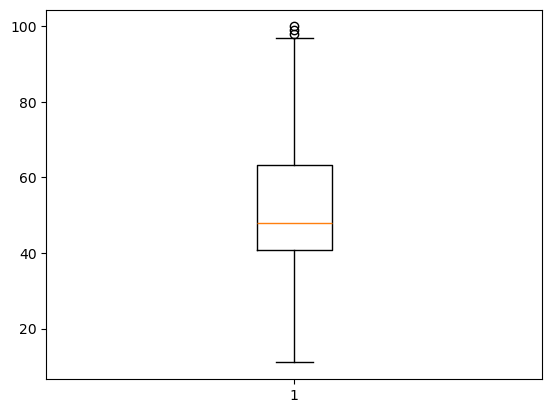

In [12]:
plt.boxplot(df['Pts'])

<Axes: xlabel='Pts', ylabel='Count'>

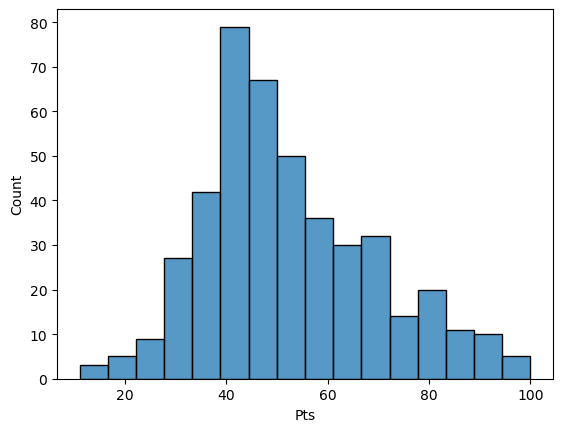

In [13]:
sns.histplot(df['Pts'])

<Axes: xlabel='Pos', ylabel='Count'>

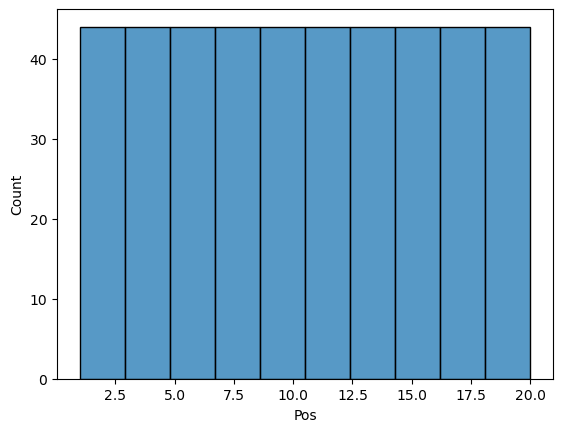

In [14]:
sns.histplot(df['Pos'])

In [15]:
FifaRating = {
    'Chelsea': 1997,
    'Liverpool': 1959,
    'Arsenal': 1954,
    'Manchester City': 1907,
    'Aston Villa': 1871,
    'Newcastle United': 1805,
    'Crystal Palace': 1794,
    'Brighton & Hove Albion': 1785,
    'Brentford': 1748,
    'AFC Bournemouth': 1746,
    'Nottingham Forest': 1743,
    'Everton': 1735,
    'Manchester United': 1709,
    'Fulham': 1696,
    'Tottenham Hotspur': 1676,
    'West Ham United': 1651,
    'Wolverhampton Wanderers': 1645,
    'Stoke City': 1526,
    'Swansea City': 1515,
    'Wigan Athletic': 1515,
    'Leeds United': 1502,
    'Burnley': 1499,
    'Birmingham City': 1498,
    'West Bromwich Albion': 1478,
    'Blackburn Rovers': 1459,
    'Queens Park Rangers': 1448,
    'Ipswich Town': 1443,
    'Middlesbrough': 1443,
    'Sunderland': 1432,
    'Portsmouth': 1428,
    'Reading': 1431,
    'Hull City': 1470,
}


In [18]:
df['FifaRating'] = df['Team'].map(FifaRating)

In [24]:
df

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,FifaRating
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,1709.0
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,1954.0
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,1959.0
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],1502.0
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],1443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable,1735.0
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable,1502.0
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship,1499.0
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship,NaN


In [27]:
df = df.drop('Team', axis=1)

In [31]:
df

,Season,Pos,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,FifaRating
0,2000-01,1,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,1709.0
1,2000-01,2,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,1954.0
2,2000-01,3,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,1959.0
3,2000-01,4,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],1502.0
4,2000-01,5,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],1443.0
...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,38,11,6,21,43,66,-23,39,Not Applicable,1735.0
436,2021-22,17,38,9,11,18,42,79,-37,38,Not Applicable,1502.0
437,2021-22,18,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship,1499.0
438,2021-22,19,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship,NaN


In [35]:
df['FifaRating'].isnull().sum()


76

In [37]:
df['FifaRating'] = df['FifaRating'].fillna(1300)

In [39]:
df

,Season,Pos,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,FifaRating
0,2000-01,1,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,1709.0
1,2000-01,2,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,1954.0
2,2000-01,3,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,1959.0
3,2000-01,4,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],1502.0
4,2000-01,5,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],1443.0
...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,38,11,6,21,43,66,-23,39,Not Applicable,1735.0
436,2021-22,17,38,9,11,18,42,79,-37,38,Not Applicable,1502.0
437,2021-22,18,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship,1499.0
438,2021-22,19,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship,1300.0


In [41]:
df['FifaRating'].isnull().sum()

0

In [43]:
X = df.drop(columns=['Pts', 'Season', 'Qualification or relegation'])
y = df['Pts']

In [45]:
print(X.shape)
print(y.shape)

(440, 9)
(440,)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [49]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [50]:
# Predict
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

# Evaluation
print("Random Forest:")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R²:", r2_score(y_test, rf_preds))

print("\nXGBoost:")
print("MSE:", mean_squared_error(y_test, xgb_preds))
print("R²:", r2_score(y_test, xgb_preds))

Random Forest:
MSE: 1.7233818181818175
R²: 0.9930117999426109

XGBoost:
MSE: 0.4653666861370105
R²: 0.9981129686593766


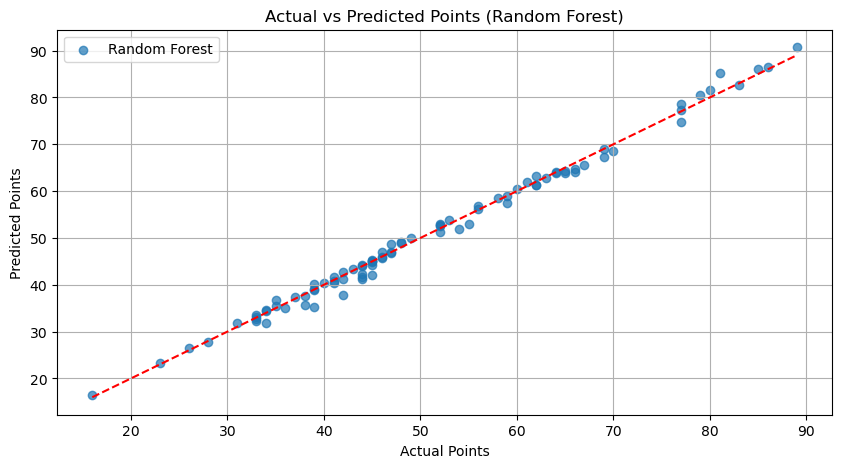

In [61]:


plt.figure(figsize=(10, 5))


plt.scatter(y_test, rf_preds, alpha=0.7, label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


In [51]:

rf_preds = rf.predict(X_test)


results_df = X_test.copy()
results_df['ActualPoints'] = y_test
results_df['PredictedPoints'] = rf_preds


results_df = results_df.reset_index(drop=True)
results_df = results_df[['ActualPoints', 'PredictedPoints']]
print(results_df.head(10))  # Show top 10


   ActualPoints  PredictedPoints
0            69            67.28
1            33            32.79
2            49            49.98
3            41            40.30
4            46            46.95
5            47            46.86
6            67            65.54
7            77            74.71
8            23            23.25
9            65            64.32


In [55]:



sample_input = pd.DataFrame({
    'Pos':[2],
    'Pld': [19],         
    'W': [13],
    'D': [4],
    'L': [2],
    'GF': [42],
    'GA': [18],
    'GD': [24],          
    'FifaRating': [1907]
})


predicted_points = rf.predict(sample_input)[0]
print(f" Predicted Final Points: {predicted_points:.2f}")


 Predicted Final Points: 55.79


In [60]:
mid_season_data = pd.DataFrame({
    'Team': [
        'Manchester City', 'Arsenal', 'Liverpool', 'Chelsea', 'Manchester United',
        'Tottenham Hotspur', 'Newcastle United', 'Aston Villa', 'Brighton & Hove Albion',
        'West Ham United', 'Everton', 'Wolverhampton Wanderers', 'Brentford', 'Fulham',
        'Crystal Palace', 'Bournemouth', 'Nottingham Forest', 'Burnley', 'Sheffield United', 'Luton Town'
    ],
    'Pld': [19]*20,
    'Pos':  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'W':    [14, 13, 12, 11, 10, 10, 9, 9, 8, 7, 6, 6, 6, 6, 5, 4, 4, 3, 2, 2],
    'D':    [3, 4, 4, 5, 4, 3, 5, 4, 6, 5, 4, 3, 5, 4, 5, 4, 3, 2, 3, 2],
    'L':    [2, 2, 3, 3, 5, 6, 5, 6, 5, 7, 9, 10, 8, 9, 9, 11, 12, 14, 14, 15],
    'GF':   [45, 42, 40, 36, 34, 32, 29, 28, 27, 24, 22, 21, 25, 24, 20, 18, 17, 14, 12, 11],
    'GA':   [18, 20, 21, 24, 26, 28, 25, 27, 28, 29, 31, 34, 30, 33, 35, 37, 40, 43, 44, 46]
})
        

In [62]:
mid_season_data['GD'] = mid_season_data['GF'] - mid_season_data['GA']

In [64]:
fifa_ratings = {
    'Manchester City': 1907,
    'Arsenal': 1954,
    'Liverpool': 1959,
    'Chelsea': 1997,
    'Manchester United': 1709,
    'Tottenham Hotspur': 1676,
    'Newcastle United': 1805,
    'Aston Villa': 1871,
    'Brighton & Hove Albion': 1650,
    'West Ham United': 1651,
    'Everton': 1735,
    'Wolverhampton Wanderers': 1600,
    'Brentford': 1590,
    'Fulham': 1575,
    'Crystal Palace': 1580,
    'Bournemouth': 1560,
    'Nottingham Forest': 1545,
    'Burnley': 1520,
    'Sheffield United': 1515,
    'Luton Town': 1495
}
mid_season_data['FifaRating'] = mid_season_data['Team'].map(fifa_ratings)

In [66]:
features = mid_season_data[['Pos','Pld','W', 'D', 'L', 'GF', 'GA', 'GD', 'FifaRating']]

In [68]:
mid_season_data['PredictedFinalPoints'] = rf.predict(features)

In [70]:
mid_season_results = mid_season_data[['Team', 'PredictedFinalPoints']].sort_values(
    by='PredictedFinalPoints', ascending=False
).reset_index(drop=True)

In [72]:
mid_season_results

,Team,PredictedFinalPoints
0,Manchester City,56.42
1,Arsenal,55.84
2,Liverpool,53.75
3,Chelsea,52.82
4,Manchester United,49.59
5,Tottenham Hotspur,49.53
6,Newcastle United,48.79
7,Aston Villa,48.45
8,Brighton & Hove Albion,47.39
9,West Ham United,46.92


In [76]:
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [78]:
joblib.dump(xgb,'xgb_model.pkl')

['xgb_model.pkl']